In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\SRIKAR PILLALAMARRI\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv(r'D:\Data Analytics\Internships\Code Alpha\Unemplyment in India\archive (2)\Unemployment in India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [4]:
df = df.dropna()

In [5]:
# Removing the leading and trailing spaces from the column names
df.columns = df.columns.str.strip()

In [6]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [7]:
df1 = df[['Date', 'Estimated Unemployment Rate (%)']]

In [8]:
df1.head()

,Date,Estimated Unemployment Rate (%)
0,31-05-2019,3.65
1,30-06-2019,3.05
2,31-07-2019,3.75
3,31-08-2019,3.32
4,30-09-2019,5.17


In [9]:
df1.rename(columns = {
    'Date' : 'ds',
    'Estimated Unemployment Rate(%)' : 'y'
}, inplace = True)

C:\Users\SRIKAR PILLALAMARRI\AppData\Local\Temp\ipykernel_28412\4129040904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns = {


In [10]:
df1.rename({
    'Estimated Unemployment Rate(%)' : 'y'
}, inplace = True)

C:\Users\SRIKAR PILLALAMARRI\AppData\Local\Temp\ipykernel_28412\3111702929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename({


In [11]:
df1.head()

,ds,Estimated Unemployment Rate (%)
0,31-05-2019,3.65
1,30-06-2019,3.05
2,31-07-2019,3.75
3,31-08-2019,3.32
4,30-09-2019,5.17


In [12]:
df1.columns = ['ds', 'y']
df1.head()

,ds,y
0,31-05-2019,3.65
1,30-06-2019,3.05
2,31-07-2019,3.75
3,31-08-2019,3.32
4,30-09-2019,5.17


In [13]:
df1.head()

,ds,y
0,31-05-2019,3.65
1,30-06-2019,3.05
2,31-07-2019,3.75
3,31-08-2019,3.32
4,30-09-2019,5.17


In [14]:
df1['ds'] = pd.to_datetime(df1['ds'], errors = 'coerce')

C:\Users\SRIKAR PILLALAMARRI\AppData\Local\Temp\ipykernel_28412\1480133607.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['ds'] = pd.to_datetime(df1['ds'], errors = 'coerce')
C:\Users\SRIKAR PILLALAMARRI\AppData\Local\Temp\ipykernel_28412\1480133607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ds'] = pd.to_datetime(df1['ds'], errors = 'coerce')


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      740 non-null    datetime64[ns]
 1   y       740 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.3 KB


In [16]:
df1['Unemployment_MA'] = df1['y'].rolling(window=12).mean()

C:\Users\SRIKAR PILLALAMARRI\AppData\Local\Temp\ipykernel_28412\1738520706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Unemployment_MA'] = df1['y'].rolling(window=12).mean()


In [17]:
df1.head()

,ds,y,Unemployment_MA
0,2019-05-31,3.65,NaN
1,2019-06-30,3.05,NaN
2,2019-07-31,3.75,NaN
3,2019-08-31,3.32,NaN
4,2019-09-30,5.17,NaN


In [18]:
df1.tail()

,ds,y,Unemployment_MA
749,2020-02-29,7.55,8.045000
750,2020-03-31,6.67,7.154167
751,2020-04-30,15.63,8.033333
752,2020-05-31,15.22,8.697500
753,2020-06-30,9.86,8.904167


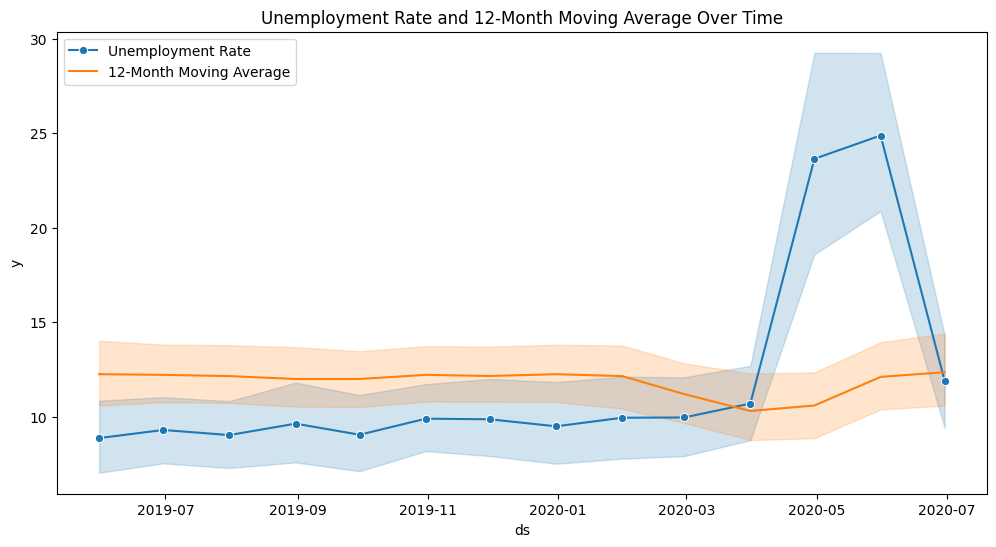

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1, x='ds', y='y', marker='o', label='Unemployment Rate')
sns.lineplot(data=df1, x='ds', y='Unemployment_MA', label='12-Month Moving Average')
plt.title("Unemployment Rate and 12-Month Moving Average Over Time")
plt.legend()
plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1['y'] = scaler.fit_transform(df1[['y']])

C:\Users\SRIKAR PILLALAMARRI\AppData\Local\Temp\ipykernel_28412\575851382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['y'] = scaler.fit_transform(df1[['y']])


In [21]:
df1.head()

,ds,y,Unemployment_MA
0,2019-05-31,0.047563,NaN
1,2019-06-30,0.039745,NaN
2,2019-07-31,0.048866,NaN
3,2019-08-31,0.043263,NaN
4,2019-09-30,0.067370,NaN


In [22]:
from prophet import Prophet
df2 = df1[['Unemployment_MA']]
df2.head()

,Unemployment_MA
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [23]:
df2.tail()

,Unemployment_MA
749,8.045000
750,7.154167
751,8.033333
752,8.697500
753,8.904167


In [24]:
df1 = df1.drop(columns = ['Unemployment_MA'])

In [25]:
model = Prophet()
model.fit(df1)
forecast = model.predict(df1)

06:04:05 - cmdstanpy - INFO - Chain [1] start processing
06:04:05 - cmdstanpy - INFO - Chain [1] done processing


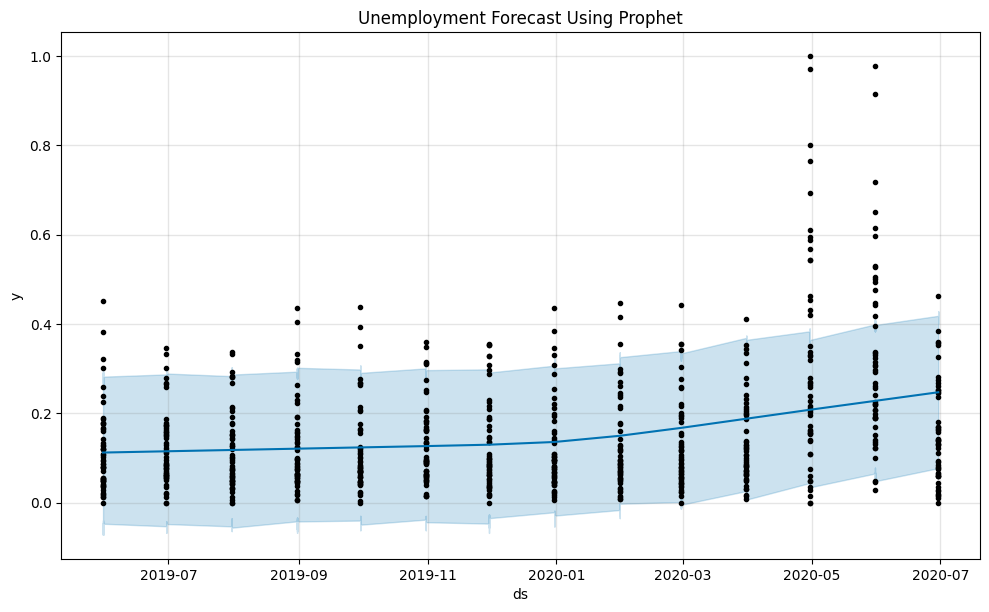

In [26]:
model.plot(forecast)
plt.title("Unemployment Forecast Using Prophet")
plt.show()

In [27]:
# Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [28]:
future_dates.tail()

,ds
374,2021-06-26
375,2021-06-27
376,2021-06-28
377,2021-06-29
378,2021-06-30


In [29]:
future_dates.head()

,ds
0,2019-05-31
1,2019-06-30
2,2019-07-31
3,2019-08-31
4,2019-09-30


In [30]:
prediction=model.predict(future_dates)

In [31]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-05-31,0.111974,-0.055782,0.275963,0.111974,0.111974,0.0,0.0,0.0,0.0,0.0,0.0,0.111974
1,2019-06-30,0.114806,-0.055478,0.282293,0.114806,0.114806,0.0,0.0,0.0,0.0,0.0,0.0,0.114806
2,2019-07-31,0.117732,-0.063003,0.297453,0.117732,0.117732,0.0,0.0,0.0,0.0,0.0,0.0,0.117732
3,2019-08-31,0.120658,-0.042947,0.292346,0.120658,0.120658,0.0,0.0,0.0,0.0,0.0,0.0,0.120658
4,2019-09-30,0.123490,-0.025562,0.306728,0.123490,0.123490,0.0,0.0,0.0,0.0,0.0,0.0,0.123490


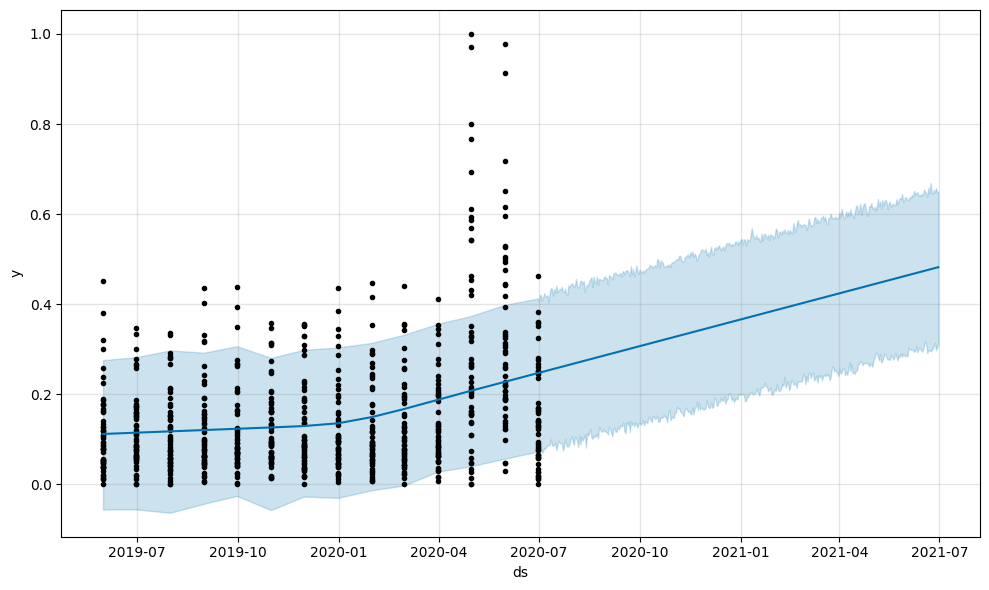

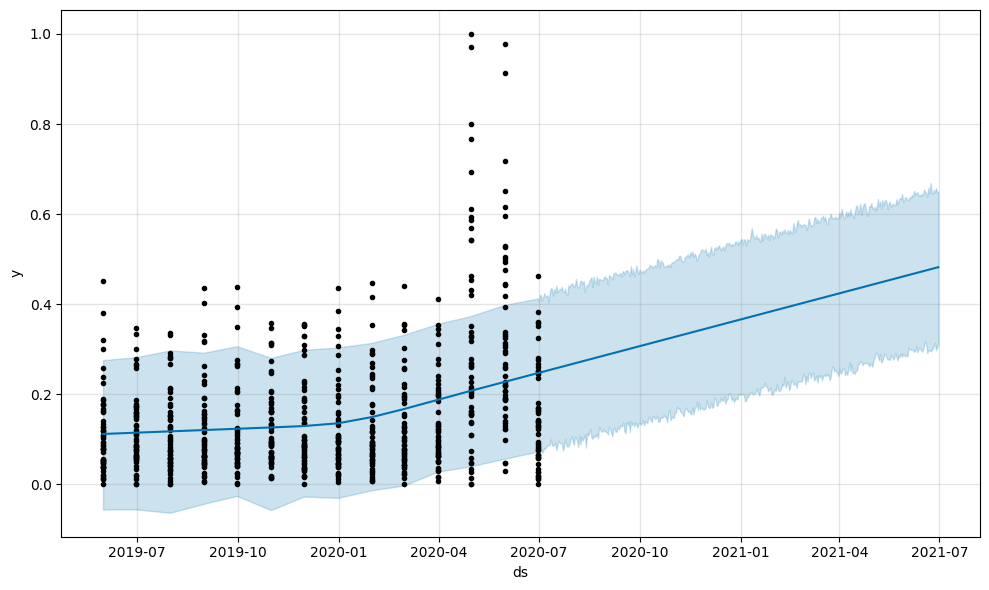

In [32]:
model.plot(prediction)

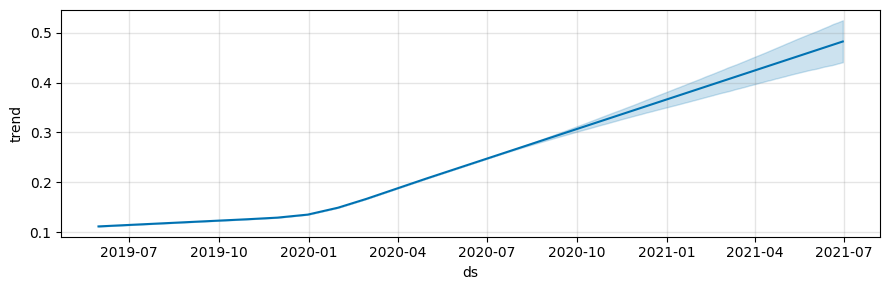

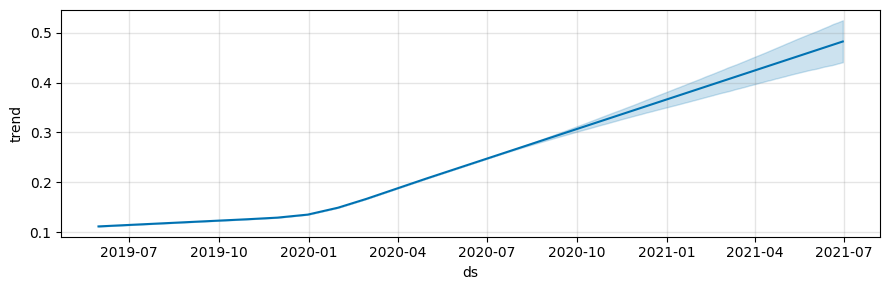

In [33]:
# Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [34]:
print(model.seasonalities)

OrderedDict()


In [35]:
print(model.yearly_seasonality)  # True if yearly seasonality is enabled
print(model.weekly_seasonality)  # True if weekly seasonality is enabled

auto
auto


In [36]:
print(df1['ds'].min(), df1['ds'].max())
print((df1['ds'].max() - df1['ds'].min()).days)

2019-05-31 00:00:00 2020-06-30 00:00:00
396


#### Initial (300 days):
Trains the model using the first 300 days of data.
Leaves enough data for both evaluation and forecast horizon.
#### Horizon (90 days):
Predicts 90 days into the future for each evaluation window.
Fits within the remaining 96 days (396 - 300).
#### Period (30 days):
Evaluates every 30 days to ensure multiple validation windows.

In [37]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(
    model=model,
    initial='300 days',   # Use 300 days of data for training
    period='30 days',     # Evaluate every 30 days
    horizon='90 days'     # Forecast 90 days into the future
)

print(df_cv.head())

  0%|          | 0/1 [00:00<?, ?it/s]

06:04:07 - cmdstanpy - INFO - Chain [1] start processing
06:04:07 - cmdstanpy - INFO - Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2020-04-30  0.135079    0.008021    0.245494  0.212275 2020-04-01
1 2020-04-30  0.135079    0.007475    0.257253  0.587568 2020-04-01
2 2020-04-30  0.135079    0.010863    0.254423  0.000000 2020-04-01
3 2020-04-30  0.135079    0.007138    0.260942  0.269612 2020-04-01
4 2020-04-30  0.135079    0.017884    0.255066  0.207323 2020-04-01


In [38]:
from prophet.diagnostics import performance_metrics

# Calculate performance metrics
df_p = performance_metrics(df_cv)
print(df_p.head())

  horizon       mse      rmse       mae     mdape     smape  coverage
0 29 days  0.089671  0.299452  0.210649  0.600387  0.831223  0.470588
1 60 days  0.077251  0.277941  0.201416  0.550933  0.730198  0.450980
2 90 days  0.013026  0.114133  0.089986  0.521107  0.654471  0.760000


C:\Users\SRIKAR PILLALAMARRI\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
C:\Users\SRIKAR PILLALAMARRI\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


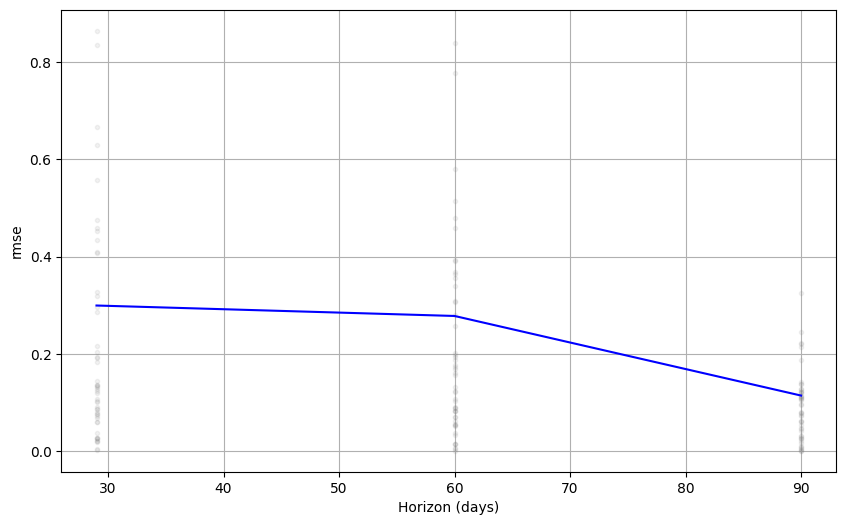

In [39]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

### From the prediction of the data, the unemployment in india is going to increase for the next 365 days.